# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [72]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")
# Display the data table for preview
combined_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [73]:
# Checking the number of mice.
total_mice=combined_data["Mouse ID"].nunique()
print(total_mice)

249


In [74]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_IDs=combined_data.loc[combined_data.duplicated(subset=["Mouse ID", "Timepoint"]),'Mouse ID'].unique()
duplicate_IDs

array(['g989'], dtype=object)

In [75]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_g989= combined_data[combined_data['Mouse ID'].isin(duplicate_IDs)]
sorted_duplicate_g989=duplicate_g989.sort_values(by=["Mouse ID", "Timepoint"])
organised_duplicate_g989= sorted_duplicate_g989[["Mouse ID","Timepoint","Drug Regimen","Sex","Age_months","Weight (g)","Tumor Volume (mm3)","Metastatic Sites"]]
organised_duplicate_g989

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
908,g989,0,Propriva,Female,21,26,45.000000,0
909,g989,0,Propriva,Female,21,26,45.000000,0
910,g989,5,Propriva,Female,21,26,48.786801,0
911,g989,5,Propriva,Female,21,26,47.570392,0
912,g989,10,Propriva,Female,21,26,51.745156,0
913,g989,10,Propriva,Female,21,26,49.880528,0
914,g989,15,Propriva,Female,21,26,51.325852,1
915,g989,15,Propriva,Female,21,26,53.442020,0
916,g989,20,Propriva,Female,21,26,55.326122,1
917,g989,20,Propriva,Female,21,26,54.657650,1


In [76]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_data = combined_data.drop_duplicates(subset=["Mouse ID"])
cleaned_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0
...,...,...,...,...,...,...,...,...
1858,z314,Stelasyn,Female,21,28,0,45.0,0
1860,z435,Propriva,Female,12,26,0,45.0,0
1863,z581,Infubinol,Female,24,25,0,45.0,0
1873,z795,Naftisol,Female,13,29,0,45.0,0


In [77]:
# Checking the number of mice in the clean DataFrame.
number_mice=cleaned_data["Mouse ID"].nunique()
print(number_mice)

249


## Summary Statistics

In [78]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
grouped = combined_data.groupby(["Drug Regimen"])

mean_tumor_volume= grouped["Tumor Volume (mm3)"].mean()
median_tumor_volume= grouped["Tumor Volume (mm3)"].median()
variance_tumor_volume=grouped["Tumor Volume (mm3)"].var()
std_tumor_volume= grouped["Tumor Volume (mm3)"].std()
sem_tumor_volume= grouped["Tumor Volume (mm3)"].sem()

# Assemble the resulting series into a single summary DataFrame.
summary_data= pd.DataFrame(
    {
        "Mean Tumor Volume":mean_tumor_volume,
        "Median Tumor Volume": median_tumor_volume,
        "Tumor Volume Variance": variance_tumor_volume,
        "Tumor Volume Std. Dev.": std_tumor_volume,
        "Tumor Volume Std. Err.": sem_tumor_volume})
summary_data

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [79]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

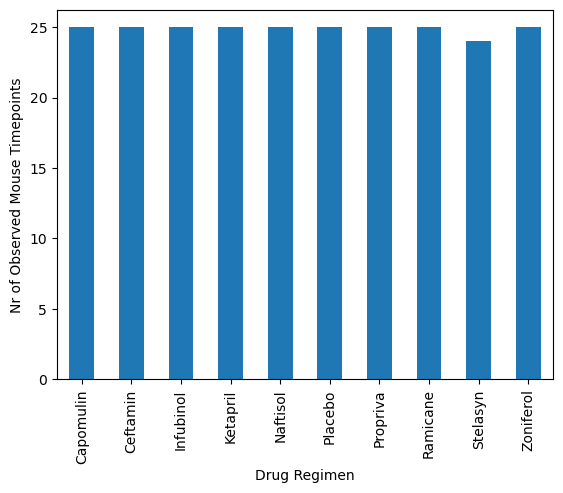

<Figure size 640x480 with 0 Axes>

In [80]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_reg=cleaned_data.groupby('Drug Regimen')

mouse_timepoint= drug_reg['Timepoint'].count()

reg_chart=mouse_timepoint.plot(kind="bar")
reg_chart.set_xlabel("Drug Regimen")
reg_chart.set_ylabel("Nr of Observed Mouse Timepoints")

plt.show()
plt.tight_layout()

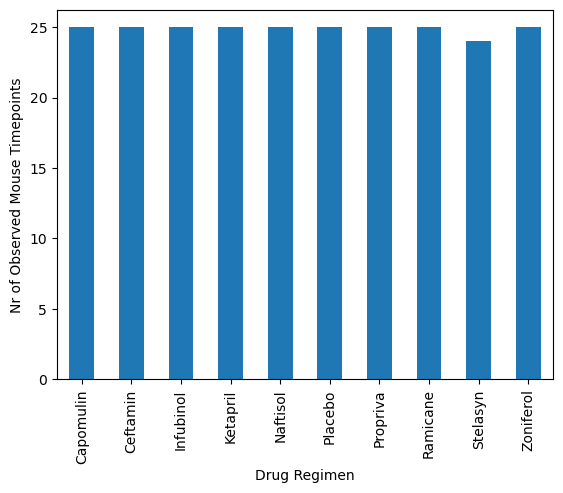

<Figure size 640x480 with 0 Axes>

In [80]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_reg=cleaned_data.groupby('Drug Regimen')

mouse_timepoint= drug_reg['Timepoint'].count()

reg_chart=mouse_timepoint.plot(kind="bar")
reg_chart.set_xlabel("Drug Regimen")
reg_chart.set_ylabel("Nr of Observed Mouse Timepoints")

plt.show()
plt.tight_layout()

In [1]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.


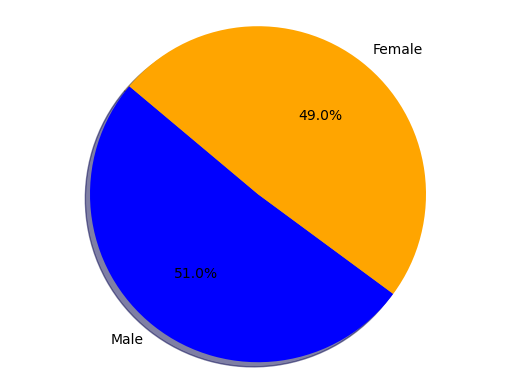

In [68]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
labels=["Male","Female"]
sizes=[51,49]
colors=["blue","orange"]

plt.title
plt.pie(sizes,labels=labels,colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")
plt.show()

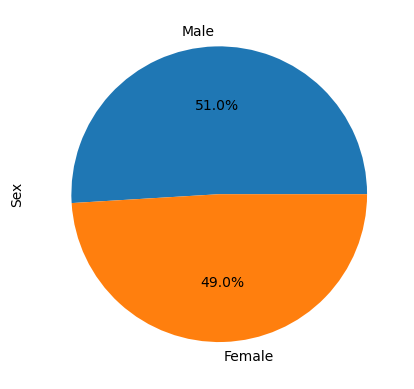

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot


## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 

    
    # Determine outliers using upper and lower bounds


Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


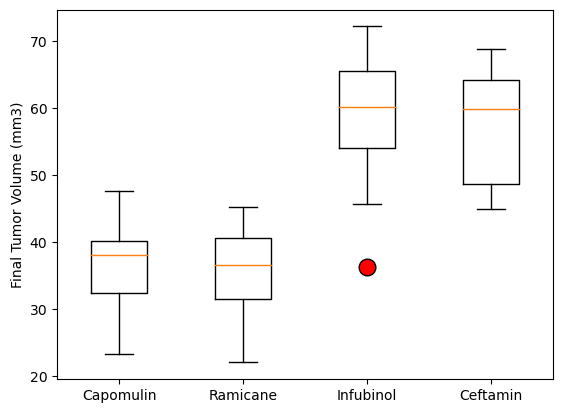

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.


## Line and Scatter Plots

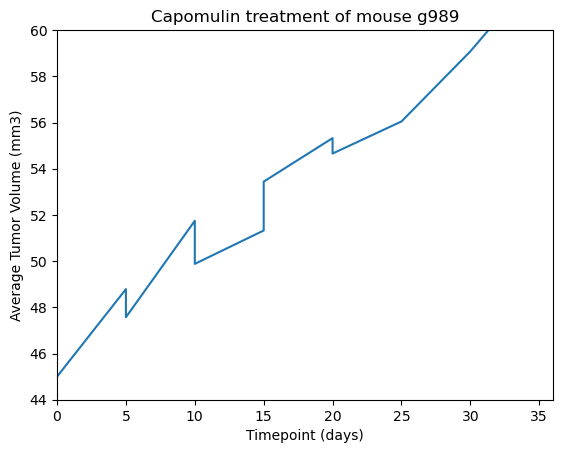

In [67]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
x_axis=organised_duplicate_g989["Timepoint"]
y_axis=organised_duplicate_g989["Tumor Volume (mm3)"]

plt.xlabel("Timepoint (days)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Capomulin treatment of mouse g989")
plt.xlim(0,36)
plt.ylim(44,60)
plt.plot(x_axis,y_axis)
plt.show()

The correlation between mouse weight and the average tumor volume is 0.84


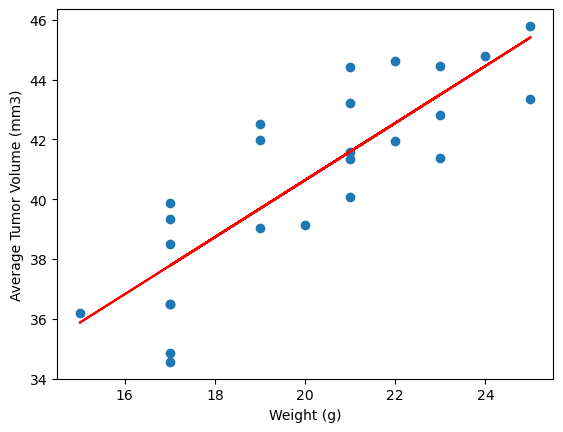

In [18]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

plt.plot(weight,TV)

plt.xlabel("Average Tumor Volume (mm3)")
plt.ylabel("Weight (g)")
plt.show() 

The correlation between mouse weight and the average tumor volume is 0.84


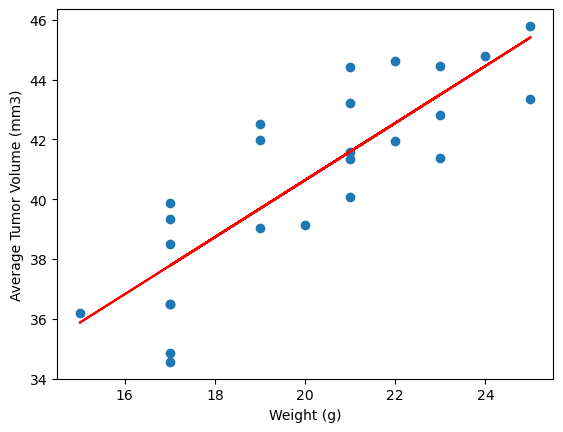

In [18]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
plt.plot(x_axis_data,TV)
plt.plot(weight,TV)

plt.xlabel("Average Tumor Volume (mm3)")
plt.ylabel("
plt.show() 

The correlation between mouse weight and the average tumor volume is 0.84


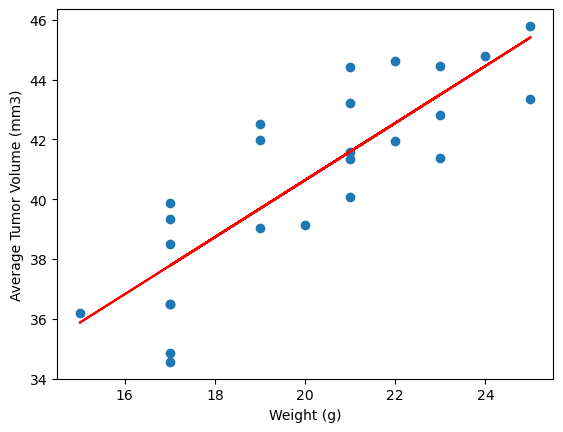

In [18]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
plt.plot(x_axis_data,TV)
plt.plot(weight,TV)

plt.xlabel("Average Tumor Volume (mm3)")
plt.ylabel("
plt.show() 

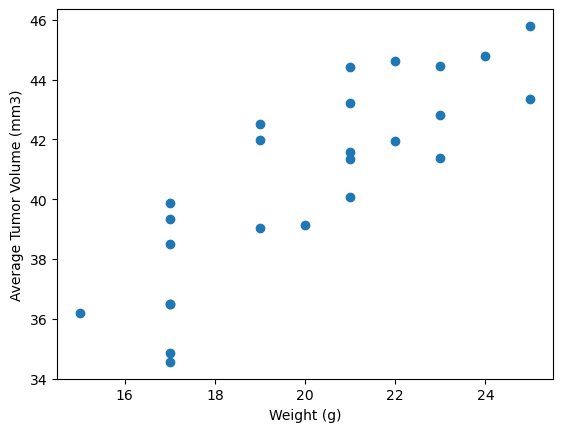

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


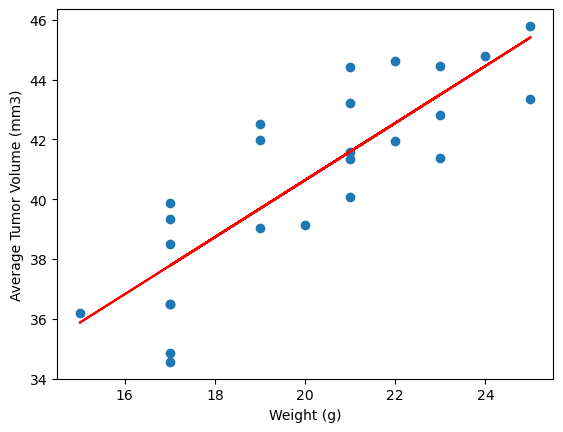

In [18]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
plt.plot(x_axis_data,TV)
plt.plot(weight,TV)

plt.xlabel("Average Tumor Volume (mm3)")
plt.ylabel("Weight")
plt.show() 